In [2]:
!pip install rasterio numpy scipy matplotlib


/tmp/ipython-input-3-3286010164.py:30: RuntimeWarning: Mean of empty slice
  mag_prof = [np.nanmean(m[(r>=rbins[i]) & (r<rbins[i+1])])


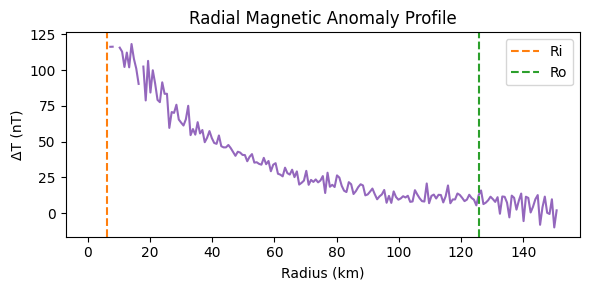

In [3]:
import rasterio, numpy as np, matplotlib.pyplot as plt


center_lon, center_lat = 70.2333, 18.6667
Ri_km = 6.296
Ro_km = 251.844/2


with rasterio.open("magnetic.tif") as src:
    mag = -src.read(1).astype(float)
    mag[mag == src.nodata] = np.nan
    transform = src.transform
    h,w = src.height, src.width


cols, rows = np.meshgrid(np.arange(w), np.arange(h))
lons, lats = rasterio.transform.xy(transform, rows, cols)
lons = np.array(lons); lats = np.array(lats)


dx = (lons - center_lon) * 111.0 * np.cos(np.deg2rad(center_lat))
dy = (lats - center_lat) * 111.0
r2d = np.sqrt(dx*dx + dy*dy)


r = r2d.ravel()
m = mag.ravel()
rbins = np.linspace(0, Ro_km*1.2, 200)
rcent = 0.5*(rbins[:-1] + rbins[1:])
mag_prof = [np.nanmean(m[(r>=rbins[i]) & (r<rbins[i+1])])
            for i in range(len(rbins)-1)]


plt.figure(figsize=(6,3))
plt.plot(rcent, mag_prof, color='tab:purple')
plt.axvline(Ri_km, linestyle='--', color='C1', label="Ri")
plt.axvline(Ro_km, linestyle='--', color='C2', label="Ro")
plt.xlabel("Radius (km)")
plt.ylabel("ΔT (nT)")
plt.title("Radial Magnetic Anomaly Profile")
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-2221567449.py:40: RuntimeWarning: Mean of empty slice
  np.nanmean(m[(r >= rbins[i]) & (r < rbins[i + 1])])


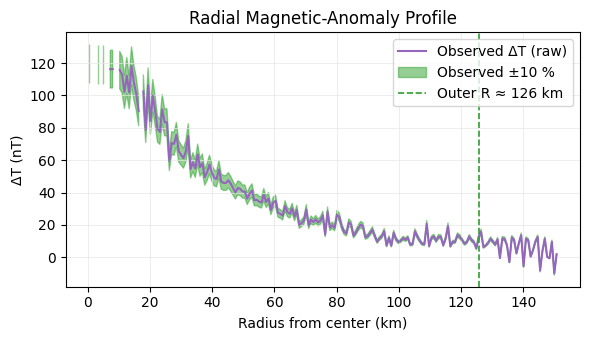

In [4]:

import rasterio
import numpy as np
import matplotlib.pyplot as plt


plt.style.use("default")
plt.rcParams["grid.color"] = "0.9"
plt.rcParams["grid.linewidth"] = 0.5


center_lon, center_lat = 70.2333, 18.6667
Ri_km = 6.296
Ro_km = 251.844 / 2


with rasterio.open("magnetic.tif") as src:
    mag = -src.read(1).astype(float)
    mag[mag == src.nodata] = np.nan
    transform = src.transform
    h, w = src.height, src.width


cols, rows = np.meshgrid(np.arange(w), np.arange(h))
lons, lats = rasterio.transform.xy(transform, rows, cols)
lons = np.array(lons)
lats = np.array(lats)


dx = (lons - center_lon) * 111.0 * np.cos(np.deg2rad(center_lat))
dy = (lats - center_lat) * 111.0
r2d = np.hypot(dx, dy)


r = r2d.ravel()
m = mag.ravel()
rbins = np.linspace(0, Ro_km * 1.2, 200)
rcent = 0.5 * (rbins[:-1] + rbins[1:])

mag_prof = [
    np.nanmean(m[(r >= rbins[i]) & (r < rbins[i + 1])])
    for i in range(len(rbins) - 1)
]


mag_upper = np.array(mag_prof) * 1.10
mag_lower = np.array(mag_prof) * 0.90


fig, ax = plt.subplots(figsize=(6, 3.5))

ax.fill_between(
    rcent, mag_lower, mag_upper,
    color="tab:green", alpha=0.5, label="Observed ±10 %"
)

ax.plot(
    rcent, mag_prof,
    color="tab:purple", linewidth=1.5, label="Observed ΔT (raw)"
)

ax.axvline(Ro_km, linestyle="--", color="C2", linewidth=1.2, label="Outer R ≈ 126 km")


ax.set_xlabel("Radius from center (km)")
ax.set_ylabel("ΔT (nT)")
ax.set_title("Radial Magnetic‐Anomaly Profile")
ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 2]  # raw, envelope, Ri, Ro
ax.legend([handles[i] for i in order], [labels[i] for i in order], loc="upper right")

plt.tight_layout()
plt.show()
